# John Henry: Direct Arylation Game Analysis

Here we analyzed the difference between BO when initialized by human and random choices.

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Human players

humans = pd.read_csv('arylation_game_summary.csv')
bo_r = pd.read_csv('arylation_bo_results_GP-EI_bs=5.csv', index_col=0)
bo_h = pd.read_csv('arylation_bo_results_GP-EI_bs=5_human_init.csv', index_col=0)

In [2]:
humans.head()

,area,expertise,experience,yield_1,temp_1,conc_1,solvent_1,ligand_1,base_1,yield_2,...,conc_99,solvent_99,ligand_99,base_99,yield_100,temp_100,conc_100,solvent_100,ligand_100,base_100
0,Pharma,Process Chemist,1_5 years,5.47,105,0.100,DMAc,BrettPhos,KOAc,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pharma,Engineer,1_5 years,2.41,105,0.057,DMAc,BrettPhos,KOAc,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pharma,Process Chemist,1_5 years,5.47,105,0.100,DMAc,BrettPhos,KOAc,75.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pharma,Engineer,1_5 years,0.00,105,0.100,DMAc,PPhtBu2,KOAc,7.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pharma,Process Chemist,1_5 years,5.47,105,0.100,DMAc,BrettPhos,KOAc,65.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bo_r.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.83,0.00,13.85,19.84,4.09,43.22,17.63,28.40,92.19,52.47,...,89.71,2.52,67.85,52.56,50.75,89.17,3.51,81.63,83.62,50.69
1,31.85,0.00,2.95,7.25,98.49,95.48,26.39,28.90,84.03,52.23,...,84.62,91.39,27.88,50.75,6.48,5.65,84.48,83.85,90.39,14.06
2,0.00,53.81,42.04,23.51,0.00,0.00,21.50,69.03,49.57,71.81,...,6.18,53.49,41.10,69.20,50.69,54.26,73.33,76.63,40.04,44.22
3,32.36,7.84,0.00,7.74,49.19,50.55,4.98,36.29,58.13,2.49,...,89.17,0.00,6.23,70.80,0.00,26.12,48.86,40.06,44.48,50.69
4,7.69,0.00,0.00,8.23,0.00,16.76,45.01,74.30,39.57,10.49,...,62.07,0.00,53.49,50.70,92.03,88.89,2.72,65.32,5.90,14.06


In [5]:
bo_h.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5.47,0.07,4.74,17.09,18.44,5.62,0.89,21.88,5.26,19.99,...,31.53,50.74,96.38,80.65,71.81,87.32,0.00,69.20,53.52,80.69
1,2.41,0.12,0.00,39.86,0.26,4.89,26.30,29.23,11.65,43.22,...,43.22,69.03,91.39,64.46,91.19,78.19,43.90,59.82,80.69,62.33
2,5.47,75.22,41.90,8.23,28.15,7.12,20.50,81.48,6.48,13.34,...,69.26,32.68,13.02,26.69,19.13,36.65,26.12,14.24,69.20,68.17
3,0.00,7.26,80.38,75.22,28.15,1.79,89.95,76.66,13.02,20.51,...,8.24,2.58,73.33,67.85,91.19,70.80,80.69,60.29,44.47,19.13
4,5.47,65.37,13.11,75.22,41.90,62.15,40.47,3.67,24.05,13.34,...,84.81,44.96,14.24,31.66,74.30,31.85,78.19,19.64,78.60,78.93


## Plotting Functions

In [6]:
# Plotting functions

yield_columns = ['yield_' + str(i) for i in range(1,101)]

def max_observed(points, batch_size):
    """
    Compute max observed yield for each batch of experiments.
    """
    
    index = []
    max_obs = []
    for i in range(round(len(points)/batch_size)):
        current_max = points[:batch_size*(i+1)].max()
        max_obs.append(current_max)
        index.append(i+1)
        
    return index, max_obs

def average(df, batch_size):
    """
    Compute the point wise average of the max observed yield
    for each batch of experiments. Only average points that 
    are present (i.e. don't pad with zeros).
    """
    
    # Get max observed for each row
    data = []
    for i in range(len(df)):
        # Drop NAs
        entry = df.iloc[i].dropna().values
        # Get max observed values
        index, max_obs = max_observed(entry, batch_size)
        data.append(max_obs)
    
    # Average
    max_obs_table = pd.DataFrame(data)
    index = []
    avg = []
    stdev = []
    for i in range(len(max_obs_table.columns.values)):
        # Drop NAs
        entry = max_obs_table.iloc[:,i].dropna().values
        # Get average and stdev
        index.append(i + 1)
        avg.append(entry.mean())
        stdev.append(entry.std())
    
    return index, avg, stdev

def avg_subsets(column):
    """Get average convergence data for unique entries of a column."""

    # Break up by entry
    entries = list(humans[column].drop_duplicates().values)
    
    # Get subset averages
    avgs = []
    for entry in entries:
        subset = humans[humans[column] == entry][yield_columns]
        index, avg, stdev = average(subset, 5)
        avgs.append(avg)
        
    # Return lists
    return entries, avgs

def convergence(data_list, legend_list=None, xlabel='Experiment Batch', 
                ylabel='Max Observed Yield', export_path=None, alpha=1,
                colormap=plt.cm.viridis, figsize=(5,5), legendloc='lower right'):
    """Plot convergence of points in data list."""
        
    fig, ax = plt.subplots(1, figsize=figsize)
    
    # Legend
    legend = True
    if legend_list == None:
        legend = False
        legend_list = [i for i in range(len(data_list))]
    
    # Plot options
    if colormap != None:  
        ax.set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 1, len(data_list))])
    ax.set(xlabel=xlabel, ylabel=ylabel)
    fig.tight_layout()
    
    # Plot
    for data, name in zip(data_list, legend_list):
        ax.plot(range(1,len(data)+1), data, lw=3, label=name, alpha=alpha)
        
    if legend:
        ax.legend(loc=legendloc)
        
    # Export & return
    if export_path != None:
        plt.savefig(export_path + '.svg', format='svg', dpi=1200, bbox_inches='tight')
        plt.show()
    else:
        return plt.show()

## Trends in human results

In [7]:
matplotlib.rcParams['font.size'] = 12

# Get paths and max observed
opt_paths_h = [humans[yield_columns].iloc[i].dropna().values for i in range(len(humans))]
max_obs_paths_h = []
for path in opt_paths_h:
    index, max_obs = max_observed(path, 5)
    max_obs_paths_h.append(max_obs)


## Bayesian optimizer performance

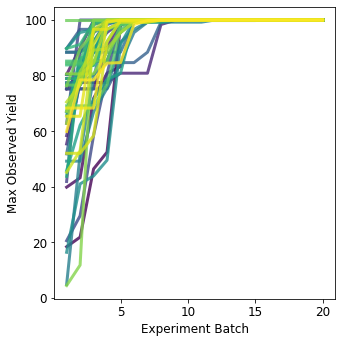

In [8]:
# Get paths and max observed for random init
opt_paths_bo_r = bo_r.values
max_obs_paths_bo_r = []
for path in opt_paths_bo_r:
    index, max_obs = max_observed(path, 5)
    max_obs_paths_bo_r.append(max_obs)
    
# Get paths and max observed for human init
opt_paths_bo_h = bo_h.values
max_obs_paths_bo_h = []
for path in opt_paths_bo_h:
    index, max_obs = max_observed(path, 5)
    max_obs_paths_bo_h.append(max_obs)

# Plot max observed
convergence(max_obs_paths_bo_h,
            alpha=0.8,
            export_path='bo_convergences_human_init')

## Bounding average human performance

In [9]:
# Lower bound. Assume that had individuals kept playing they 
# would not have improved yield

opt_paths_lower = humans[yield_columns].fillna(0.0).values
max_obs_paths_lower = []
for path in opt_paths_lower:
    index, max_obs = max_observed(path, 5)
    max_obs_paths_lower.append(max_obs)

# Upper boudn. Assume that had individuals kept playing they 
# would have found optimal conditions in the next round

opt_paths_upper = humans[yield_columns].fillna(100.0).values
max_obs_paths_upper = []
for path in opt_paths_upper:
    index, max_obs = max_observed(path, 5)
    max_obs_paths_upper.append(max_obs)

In [10]:
# Get averages
humans_i, humans_avg, humans_std = average(humans[yield_columns], 5)
humans_lower_i, humans_lower_avg, humans_lower_std = average(humans[yield_columns].fillna(0.0), 5)
humans_upper_i, humans_upper_avg, humans_upper_std = average(humans[yield_columns].fillna(100.0), 5)

## Comparision to BO results

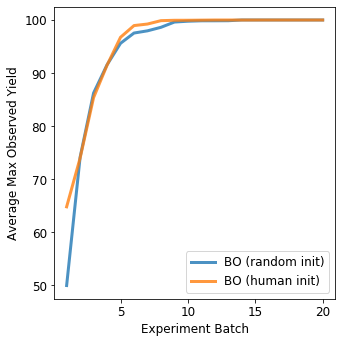

In [12]:
bo_i, bo_r_avg, bo_r_std = average(bo_r, 5)
bo_i, bo_h_avg, bo_h_std = average(bo_h, 5)

convergence([bo_r_avg, bo_h_avg],
            alpha=0.8,
            legend_list=['BO (random init)', 'BO (human init)'],
            colormap=None,
            ylabel='Average Max Observed Yield',
            legendloc='lower right',
            export_path='bo_avg_convergence(human_vs_rand_init)')

## Hypothesis testing

Let's use hypothesis testing to see if human init performance = randomm init performance.

In [13]:
# Functions

import statsmodels.stats.api as sms

def t_test(X1, X2, sample_vars='equal', print_out=True):
    """
    t-test for the null hypothesis of identical means. The unpaired 
    t-test should not be used if there is a significant difference 
    between the variances of the two samples. Here, if the variance
    of the samples is not assumed to be the same, then Welsh t-test 
    with Satterthwait degrees of freedom is used.
    """
    
    if sample_vars == 'equal':
        usevar = 'pooled'
    else:
        usevar = 'unequal'
        
    cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
    ci = cm.tconfint_diff(usevar=usevar)
    t_value = cm.ttest_ind(usevar=usevar)
    
    if print_out == True:
        print('95% CI:', ci)
        print('DOF:', t_value[2])
        print('t-stat:', t_value[0])
        print('p-value:', t_value[1])
    else:
        return [t_value[2], t_value[0], t_value[1], ci[0], ci[1]]

# t-test for optimization paths
  
def path_stats(pop1_paths, pop2_paths, steps=range(21)):
    """
    Conduct a Welsh's t-test with the null hypothesis of identical
    means at each step of optimization.
    """

    summary = []
    for i in steps:
        
        # Data for optimization step i
        pop1 = pop1_paths.iloc[:,i].dropna().values
        pop2 = pop2_paths.iloc[:,i].dropna().values
        
        # Hypothesis test
        test = t_test(pop1, 
                      pop2, 
                      sample_vars='unequal', 
                      print_out=False)
        
        summary.append([i] + test)
    
    columns = ['Batch', 'DOF', 't-value', 'p-value', '95% CI (l)', '95% CI (u)']
    summary = pd.DataFrame(summary, columns=columns)
    
    return summary

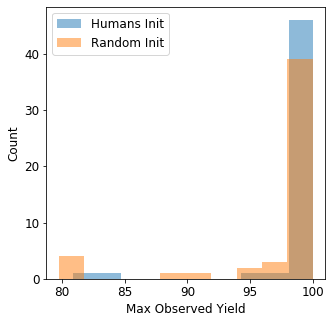

Welchs t-test:
95% CI: (-0.4270481418095855, 3.241848141809605)
DOF: 82.2413045808866
t-stat: 1.5261505015421124
p-value: 0.13080916500716783


In [14]:
# Example of t-test results

# Data
step = 5
human_step = pd.DataFrame(max_obs_paths_bo_h).iloc[:,step].dropna().values
random_step = pd.DataFrame(max_obs_paths_bo_r).iloc[:,step].dropna().values

# Disributions
fig, ax = plt.subplots(1, figsize=(5,5))
ax.hist(human_step, alpha=0.5, label='Humans Init')
ax.hist(random_step, alpha=0.5, label='Random Init')
ax.legend(loc='upper left')
ax.set_xlabel('Max Observed Yield')
ax.set_ylabel('Count')
plt.savefig('experiment_batch_5_max_obs_dists_init.svg', format='svg', bbox_inches='tight')
plt.show()

# t-tests
print('Welchs t-test:')
t_test(human_step, random_step, sample_vars='unequal')

In [18]:
# Get path statistics

random_vs_human = path_stats(pd.DataFrame(max_obs_paths_bo_r), pd.DataFrame(max_obs_paths_bo_h), steps=range(15))

print(random_vs_human.head())


   Batch        DOF   t-value   p-value  95% CI (l)  95% CI (u)
0      0  95.067715 -2.994461  0.003505  -24.661488   -4.998112
1      1  97.970373  0.040331  0.967911   -7.471757    7.781757
2      2  97.559104  0.300188  0.764673   -4.872700    6.609500
3      3  96.587521  0.029933  0.976182   -4.819816    4.967416
4      4  87.272629 -0.810595  0.419803   -3.914487    1.646487


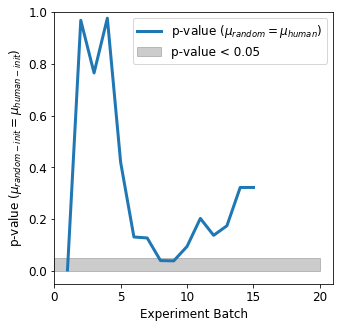

In [22]:
# Plot hypothesis testing summary

# Disributions
fig, ax3 = plt.subplots(1, figsize=(5,5))

# p < 0.05
ax3.fill_between([0,20], [0.05, 0.05], color='black', alpha=0.2, label='p-value < 0.05')

# Paths
ax3.plot(range(1,16), random_vs_human['p-value'], linewidth=3, label='p-value ($\mu_{random}=\mu_{human}$)')

# Parameters
ax3.set_ylim(-0.05, 1)
ax3.set_ylabel('p-value ($\mu_{random-init}=\mu_{human-init}$)')
ax3.set_xlabel('Experiment Batch')
ax3.set_xlim(0,21)
ax3.legend(loc='upper right')

plt.savefig('path_hypothesis_testing_init.svg', format='svg', bbox_inches='tight')
plt.show()
